# Data Science & Business Analytics Internship at The Sparks Foundation (Feb 2021)

## __Author: Soma Dey__

## Task 1 : Prediction using Supervised Machine Learning

#### _Objective: Predict the percentage score of a student based on the number of study hours using the Linear Regression supervised machine learning algorithm._

### 1. Importing the dataset and all required libraries

In [29]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [30]:
# Reading data from remote link
url = "http://bit.ly/w-data"
dataset = pd.read_csv(url)
print("Data imported successfully")

Data imported successfully


### 2. Data Preprocessing

In [31]:
#printing head(first few rows) of the dataset 
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [32]:
#Now print the last 5 records
dataset.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [33]:
#Check if there any null value in the Dataset
dataset.isnull == True

False

+ **There is no null value in the Dataset so, we can now visualize our Data.**

In [34]:
#the datatype of the columns
dataset.dtypes

Hours     float64
Scores      int64
dtype: object

In [35]:
#here we use describe() method so that we can able to see percentiles,mean,std,max,count of the given dataset.
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### 3. Data Visualization

+ **Now I have plot the dataset to check wheather they have some relation or not.**

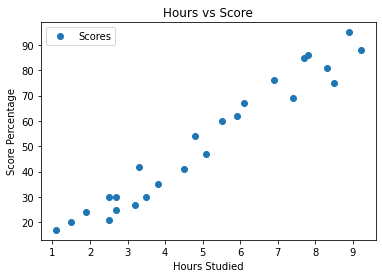

In [36]:
dataset.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Score')  
plt.xlabel('Hours Studied')  
plt.ylabel('Score Percentage')  
plt.show()

+ **We can visualize by looking at the above graph, it shows that there is a linear relation between the number of hours studied and percentage score obtained.**

### 4. Preparing the dataset

+ **Here we will divide the dataset into attributes (input) and labels (output). Then we will split the dataset into two parts - Testing data and Training data**

In [37]:
X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:,1].values
print(X)
print(Y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


### 5. Splitting dataset into training and test set

In [38]:
#spliting the data into training and testing data. The ratio of this data is 20% (Test data) and 80% (Train Data)
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state = 0,test_size=0.2)

### 6. Training the Algorithm

In [39]:
print("X train.shape =", X_train.shape)
print("Y train.shape =", Y_train.shape)
print("X test.shape  =", X_test.shape)
print("Y test.shape  =", Y_test.shape)

X train.shape = (20, 1)
Y train.shape = (20,)
X test.shape  = (5, 1)
Y test.shape  = (5,)


In [40]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [41]:
# Here we use fit function to tell the algorithm on which data to work
model.fit(X_train, Y_train)

LinearRegression()

In [42]:
#plotting the REGRESSION LINE (Y = MX + C)
Y0 = model.intercept_ + model.coef_*X_train

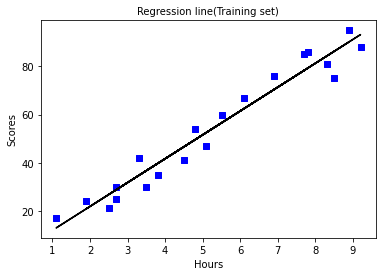

In [43]:
# Visualising the Training dataset 
plt.scatter(X_train,Y_train,color='blue',marker='s')
plt.plot(X_train,Y0,color='black')
plt.xlabel("Hours",fontsize=10)
plt.ylabel("Scores",fontsize=10)
plt.title("Regression line(Training set)",fontsize=10)
plt.show()

### 7. Predictions Making

In [44]:
#predicting the Scores for test data
Y_predicted=model.predict(X_test)
print(Y_predicted)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [45]:
#now print the Y_test (Actual Score)
Y_test

array([20, 27, 69, 30, 62], dtype=int64)

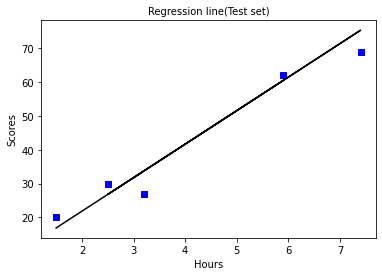

In [46]:
#plotting the line on test data
plt.scatter(X_test,Y_test,color='blue',marker='s')
plt.plot(X_test,Y_predicted,color='black')
plt.xlabel("Hours",fontsize=10)
plt.ylabel("Scores",fontsize=10)
plt.title("Regression line(Test set)",fontsize=10)
plt.show()

### 8. Comparing the Predicted Score with the Actual Score

In [47]:
df_compare = pd.DataFrame({'Actual score': Y_test, 'Predicted score': Y_predicted})  
df_compare

,Actual score,Predicted score
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### 9. Evaluating the Model

In [48]:
# Finding the accuracy of the model
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_predicted))

Mean Absolute Error: 4.183859899002975


+ **Here small value of Mean absolute error indicates that the chances of error or wrong forecasting through the model are very less.**

## **Question : What will be predicted score if a student studies for 9.25 hrs/ day?**

In [49]:
#Testing the data with the model
hours = 9.25
predict_score = model.predict([[hours]])
print("The predicted score if a student studies for",hours, "hrs/day :", predict_score[0])

The predicted score if a student studies for 9.25 hrs/day : 93.69173248737538


## **According to the regression model if a student studies for 9.25 hours a day then he/she is likely to score 93.69 marks.**

# Thank You